In [20]:
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns

img = cv.imread("Lab1.png")
rows, cols = img.shape[:2]

In [26]:
#Task1

linear = cv.resize(img, None, fx=1.5, fy=1.5, interpolation=cv.INTER_LINEAR)
cv.imshow("Linear" , linear)

cv.waitKey(0)
cv.destroyAllWindows()

In [27]:
nearest = cv.resize(img, None, fx=1.5, fy=1.5 , interpolation=cv.INTER_NEAREST)
cv.imshow("Nearest Neighbor" , nearest)
cv.waitKey(0)
cv.destroyAllWindows()

In [28]:
# cubic_height = rows ** 3
# cubic_width = cols ** 3

# polynomial = cv.resize(img, (cubic_width, cubic_height), interpolation=cv.INTER_LINEAR)
# cv.imshow("polynomial" , polynomial)
# cv.waitKey(0)
# cv.destroyAllWindows()

polynomial = cv.resize(img, None, fx = 1.5, fy=1.5, interpolation=cv.INTER_CUBIC)
cv.imshow("Polynomial" , polynomial)
cv.waitKey(0)
cv.destroyAllWindows()

In [29]:


box_blur = cv.blur(img, (25, 25))

cv.imshow("Box Blur" , box_blur)
cv.waitKey(0)
cv.destroyAllWindows()

gaussian = cv.GaussianBlur(img, (19,19), 0)
cv.imshow("Gaussian Blur" , gaussian)
cv.waitKey(0)
cv.destroyAllWindows()

adaptive = cv.bilateralFilter(img, d=59, sigmaColor=75, sigmaSpace=75)
cv.imshow("Adaptive Blur", adaptive)
cv.waitKey(0)
cv.destroyAllWindows()


: 

In [15]:
#Task 2
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve,ConfusionMatrixDisplay, roc_auc_score

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype('int')
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

y_train_oh = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_oh = tf.keras.utils.to_categorical(y_test, num_classes=10)


ann_model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)), 
    Dropout(0.2),
    Dense(256, activation='relu'),                     
    Dropout(0.2),
    Dense(10, activation='softmax')              
])


ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


ann_model.fit(X_train, y_train_oh, epochs=10, batch_size=128, verbose=2)


y_proba_ann = ann_model.predict(X_test)
y_pred_ann = y_proba_ann.argmax(axis=1)


/Users/n1kk_08/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
438/438 - 2s - 5ms/step - accuracy: 0.9183 - loss: 0.2752
Epoch 2/10
438/438 - 2s - 4ms/step - accuracy: 0.9656 - loss: 0.1097
Epoch 3/10
438/438 - 1s - 3ms/step - accuracy: 0.9764 - loss: 0.0746
Epoch 4/10
438/438 - 1s - 3ms/step - accuracy: 0.9805 - loss: 0.0601
Epoch 5/10
438/438 - 1s - 3ms/step - accuracy: 0.9842 - loss: 0.0499
Epoch 6/10
438/438 - 1s - 3ms/step - accuracy: 0.9876 - loss: 0.0386
Epoch 7/10
438/438 - 1s - 3ms/step - accuracy: 0.9886 - loss: 0.0340
Epoch 8/10
438/438 - 1s - 3ms/step - accuracy: 0.9906 - loss: 0.0288
Epoch 9/10
438/438 - 1s - 3ms/step - accuracy: 0.9909 - loss: 0.0275
Epoch 10/10
438/438 - 1s - 3ms/step - accuracy: 0.9914 - loss: 0.0253
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step


In [9]:
print("Model evaluation of random forest: ")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
    
# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision: ", precision)
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall: ", recall)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score: ", f1)

Model evaluation of random forest: 
Accuracy: 0.9671
Precision:  0.9671561515620307
Recall:  0.9671428571428572
F1 Score:  0.9671348262202857


In [13]:
print("Model evaluation of ANN: ")

accuracy = accuracy_score(y_test, y_pred_ann)
print(f"Accuracy: {accuracy:.4f}")
    
# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred_ann, average='weighted')
print("Precision: ", precision)
recall = recall_score(y_test, y_pred_ann, average='weighted')
print("Recall: ", recall)
f1 = f1_score(y_test, y_pred_ann, average='weighted')
print("F1 Score: ", f1)

Model evaluation of ANN: 
Accuracy: 0.9800
Precision:  0.9801914639187527
Recall:  0.98
F1 Score:  0.980033895596776


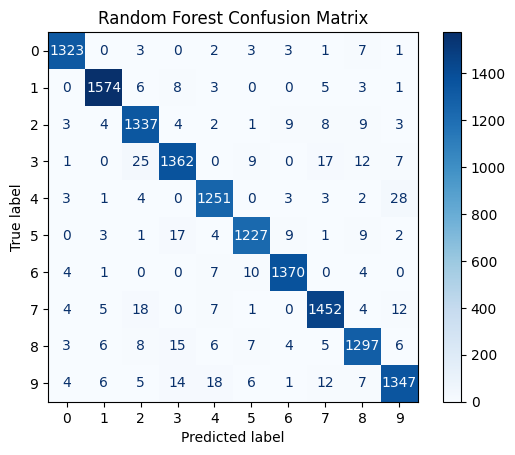

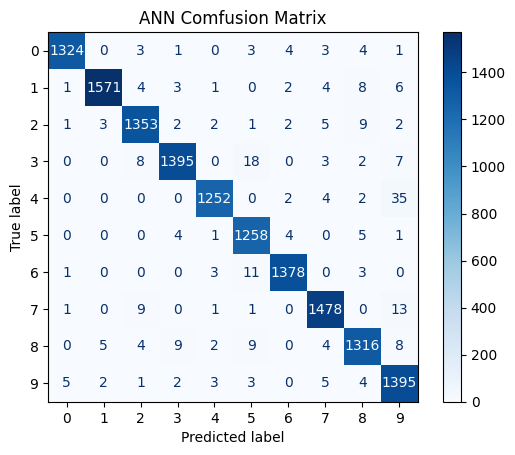

In [19]:


# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm_rf, display_labels=range(10)).plot(cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

# ANN Confusion Matrix
cm_ann = confusion_matrix(y_test, y_pred=y_pred_ann)
ConfusionMatrixDisplay(cm_ann, display_labels=range(10)).plot(cmap="Blues")
plt.title("ANN Comfusion Matrix")
plt.show()


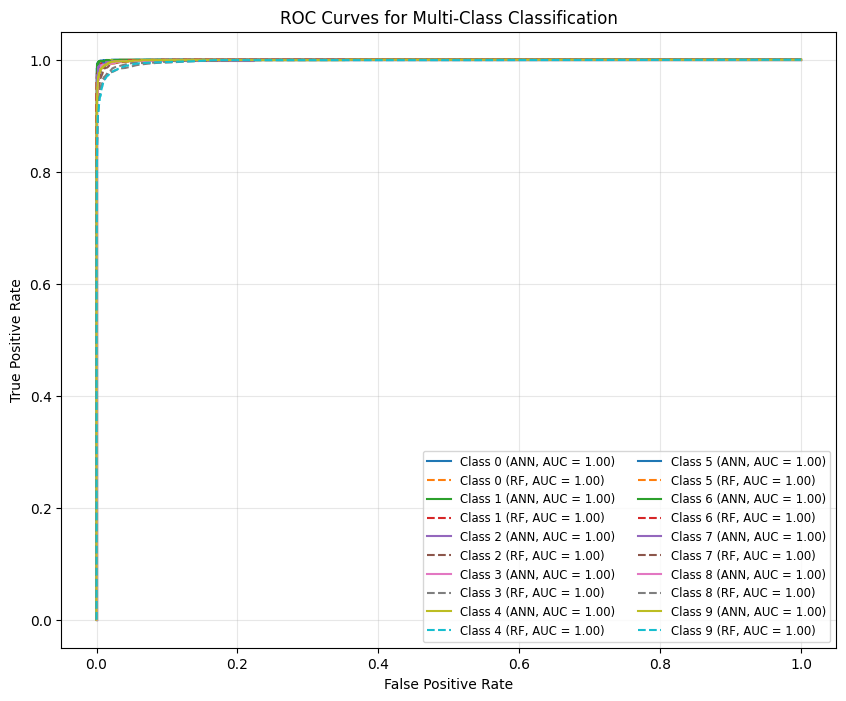

In [25]:
y_test_bin = label_binarize(y_test, classes=range(10))  

# Compute ROC-AUC scores
roc_auc_rf = roc_auc_score(y_test_bin, y_proba_rf, multi_class='ovr')
roc_auc_ann = roc_auc_score(y_test_bin, y_proba_ann, multi_class='ovr')

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(10):  
    # ANN
    fpr_ann, tpr_ann, _ = roc_curve(y_test_bin[:, i], y_proba_ann[:, i])
    plt.plot(fpr_ann, tpr_ann, label=f"Class {i} (ANN, AUC = {roc_auc_score(y_test_bin[:, i], y_proba_ann[:, i]):.2f})")
    
    # Random Forest
    fpr_rf, tpr_rf, _ = roc_curve(y_test_bin[:, i], y_proba_rf[:, i])
    plt.plot(fpr_rf, tpr_rf, linestyle="--", label=f"Class {i} (RF, AUC = {roc_auc_score(y_test_bin[:, i], y_proba_rf[:, i]):.2f})")

# General plot settings
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Multi-Class Classification")
plt.legend(loc="best", fontsize="small", ncol=2) 
plt.grid(alpha=0.3)
plt.show()